# Part 1c: Information Gain for Decision Trees
**DUE September 17th 2018**

## Introduction

The code for this project consists of several Python files, some of
which you will need to read and understand in order to complete the
assignment, and some of which you can ignore.

### Files You'll Edit

``assignment_1c.ipynb``: Will be your edited copy of this notebook pertaining to part 1c of the assignment.

### Files you might want to look at
  
``binary.py``: Our generic interface for binary classifiers (actually
works for regression and other types of classification, too).

``datasets.py``: Where a handful of test data sets are stored.

``util.py``: A handful of useful utility functions: these will
undoubtedly be helpful to you, so take a look!

``runClassifier.py``: A few wrappers for doing useful things with
classifiers, like training them, generating learning curves, etc.

``mlGraphics.py``: A few useful plotting commands

``data/*``: all of the datasets we'll use.

### What to Submit

You will hand in all of the python files listed above under "Files
you'll edit". You will also have to answer the written questions in this
notebook denoted **Q#:** in the corresponding cells denoted with **A#:**.

#### Autograding

Your code will be autograded for technical correctness. Please **do
not** change the names of any provided functions or classes within the
code, or you will wreak havoc on the autograder. However, the
correctness of your implementation -- not the autograder's output --
will be the final judge of your score.  If necessary, we will review
and grade assignments individually to ensure that you receive due
credit for your work.

In [1]:
# Jupyter magic!
%matplotlib inline

Your first task is to write code to support the use of the information gain splitting criterion for decision tree learning. **You should now complete all lines marked ``TODO`` in ``dt.py``, so that our code handles both splitting criteria (misclassification rate and information gain).** Once you've done that, we can test our code for the new splitting criterion:

In [2]:
import dumbClassifiers, datasets
import numpy as np
import runClassifier
import dt as dt

In [3]:
h = dt.DT({'maxDepth': 1, 'criterion': 'ig'})
h

Leaf 1

In [4]:
################################################################################
# TODO: Implement dt.train(...)                                                #
################################################################################
h.train(datasets.TennisData.X, datasets.TennisData.Y)
h

Branch 4 [Gain='1.8792']
  Leaf 1.0
  Leaf 1.0

In [5]:
from numpy import *

from binary import *
c = 0.6428571428571429
(c*(math.log(c,2))) + ((1-c)*math.log((1-c),2))

-0.9402859586706311

This is for a simple depth-one decision tree (aka a decision stump). Notice how we print the information gain corresponding to each branch in the tree.

If we let it get deeper, we get things like:

In [6]:
h = dt.DT({'maxDepth': 2, 'criterion': 'ig'})
h.train(datasets.TennisData.X, datasets.TennisData.Y)
h

Branch 4 [Gain='1.8792']
  Branch 2 [Gain='1.8932']
    Leaf 1.0
    Leaf 1.0
  Branch 7 [Gain='1.8366']
    Leaf 1.0
    Leaf 1.0

In [7]:
h = dt.DT({'maxDepth': 5, 'criterion': 'ig'})
h.train(datasets.TennisData.X, datasets.TennisData.Y)
h

Branch 4 [Gain='1.8792']
  Branch 2 [Gain='1.8932']
    Branch 7 [Gain='1.7925']
      Branch 5 [Gain='1.5000']
        Branch 3 [Gain='1.8366']
          Leaf 1.0
          Leaf 1.0
        Leaf 1.0
      Branch 6 [Gain='1.0000']
        Leaf 1.0
        Leaf -1.0
    Branch 1 [Gain='2.0000']
      Branch 0 [Gain='2.0000']
        Leaf 1.0
        Leaf 1.0
      Leaf 1.0
  Leaf 1.0

We can do something similar on the sentiment data (this will take a bit longer---it takes about 10 seconds on my laptop):

In [8]:
h = dt.DT({'maxDepth': 2, 'criterion': 'ig'})
h.train(datasets.SentimentData.X, datasets.SentimentData.Y)
h

Branch 983 [Gain='1.9999']
  Branch 8151 [Gain='1.9999']
    Leaf 1.0
    Leaf 1.0
  Branch 8160 [Gain='1.9999']
    Leaf 1.0
    Leaf 1.0

We can look up the words (your results here might be different due to hashing):

In [9]:
print(626, datasets.SentimentData.words[626])
print(683, datasets.SentimentData.words[683])
print(1627, datasets.SentimentData.words[1627])

626 bad
683 worst
1627 stupid


Based on this, we can rewrite the tree (by hand) as:

```python
Branch 'bad'
  Branch 'worst'
    Leaf 1.0
    Leaf -1.0
  Branch 'stupid'
    Leaf -1.0
    Leaf -1.0
```

Now, we will test prediction (this takes about a minute for me):

In [10]:
################################################################################
# TODO: Implement dt.predict(...)                                              #
################################################################################
runClassifier.trainTestSet(dt.DT({'maxDepth': 1, 'criterion': 'ig'}), datasets.SentimentData)
runClassifier.trainTestSet(dt.DT({'maxDepth': 3, 'criterion': 'ig'}), datasets.SentimentData)
runClassifier.trainTestSet(dt.DT({'maxDepth': 5, 'criterion': 'ig'}), datasets.SentimentData)

Training accuracy 0.504167, test accuracy 0.5025
Training accuracy 0.504167, test accuracy 0.5025
Training accuracy 0.504167, test accuracy 0.5025


We can use more ``runClassifier`` functions to generate learning
curves and hyperparameter curves:

Training classifier on 2 points...
Training accuracy 0.5, test accuracy 0.5025
Training classifier on 3 points...
Training accuracy 0.666667, test accuracy 0.5025
Training classifier on 5 points...
Training accuracy 0.6, test accuracy 0.5025
Training classifier on 10 points...
Training accuracy 0.7, test accuracy 0.5025
Training classifier on 19 points...
Training accuracy 0.526316, test accuracy 0.4975
Training classifier on 38 points...
Training accuracy 0.5, test accuracy 0.5025
Training classifier on 75 points...
Training accuracy 0.506667, test accuracy 0.5025
Training classifier on 150 points...
Training accuracy 0.54, test accuracy 0.4925
Training classifier on 300 points...
Training accuracy 0.513333, test accuracy 0.4925
Training classifier on 600 points...
Training accuracy 0.501667, test accuracy 0.5025
Training classifier on 1200 points...
Training accuracy 0.504167, test accuracy 0.5025


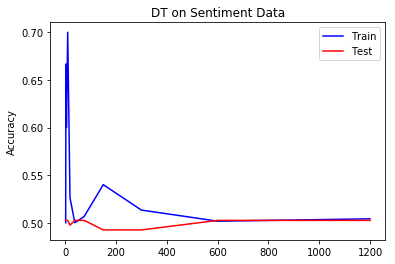

In [11]:
curveIG = runClassifier.learningCurveSet(dt.DT({'maxDepth': 9, 'criterion': 'ig'}), datasets.SentimentData)
runClassifier.plotCurve('DT on Sentiment Data', curveIG)

This plots training and test accuracy as a function of the number of
data points (x-axis) used for training and y-axis is accuracy.

Now let's compare information gain with misclassification rate. First we'll generate the learning curve for misclassification rate again. Then we'll plot the curves on the same graph.

Training classifier on 2 points...
Training accuracy 1, test accuracy 0.5
Training classifier on 3 points...
Training accuracy 1, test accuracy 0.5
Training classifier on 5 points...
Training accuracy 1, test accuracy 0.5
Training classifier on 10 points...
Training accuracy 1, test accuracy 0.595
Training classifier on 19 points...
Training accuracy 1, test accuracy 0.48
Training classifier on 38 points...
Training accuracy 1, test accuracy 0.62
Training classifier on 75 points...
Training accuracy 1, test accuracy 0.56
Training classifier on 150 points...
Training accuracy 0.953333, test accuracy 0.56
Training classifier on 300 points...
Training accuracy 0.926667, test accuracy 0.575
Training classifier on 600 points...
Training accuracy 0.881667, test accuracy 0.5975
Training classifier on 1200 points...
Training accuracy 0.833333, test accuracy 0.6475


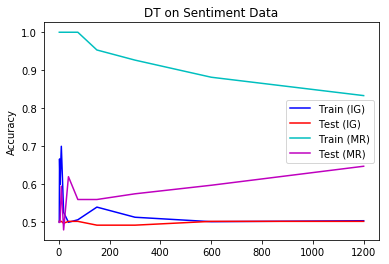

In [12]:
curveMR = runClassifier.learningCurveSet(dt.DT({'maxDepth': 9, 'criterion': 'mr'}), datasets.SentimentData)
runClassifier.plotCurvePair('DT on Sentiment Data', curveIG, 'IG', curveMR, 'MR')

**Q1:** Briefly compare the two **training** curves. Does either splitting criterion perform better than the other for small dataset size (say, N<200)? Why or why not? How about as N increases to 1200? Use your understanding of both criteria to answer these questions.

**A1:** For training the results are unusual. It shows higher training accuracy than when N is incresed. Which is similar to part 1a where for less data the model is very well unfitted. This covers less cases and the training accuracy is around 1. 

**Q2:** Briefly compare the two **test** curves. Does either splitting criterion lead to better generalization than the other for small dataset size (say, N<200)? Why or why not? How about as N increases to 1200? Use your understanding of both criteria to answer these questions.

**A2:** When the dataset size is low, the splititng criterion doesn't perform well as there is low test accuracy. It improves as N is increased as it increases the dataset for both testing and training, which allows a more comprehensive learning.

We can also generate similar curves by changing the maximum depth hyperparameter:

Training classifier with maxDepth=1...
Training accuracy 0.504167, test accuracy 0.5025
Training classifier with maxDepth=2...
Training accuracy 0.504167, test accuracy 0.5025
Training classifier with maxDepth=4...
Training accuracy 0.504167, test accuracy 0.5025
Training classifier with maxDepth=6...
Training accuracy 0.504167, test accuracy 0.5025
Training classifier with maxDepth=8...
Training accuracy 0.504167, test accuracy 0.5025
Training classifier with maxDepth=12...
Training accuracy 0.504167, test accuracy 0.5025
Training classifier with maxDepth=16...
Training accuracy 0.504167, test accuracy 0.5025
Training classifier with maxDepth=1...
Training accuracy 0.630833, test accuracy 0.595
Training classifier with maxDepth=2...
Training accuracy 0.6675, test accuracy 0.5825
Training classifier with maxDepth=4...
Training accuracy 0.7325, test accuracy 0.6375
Training classifier with maxDepth=6...
Training accuracy 0.789167, test accuracy 0.635
Training classifier with maxDepth=8.

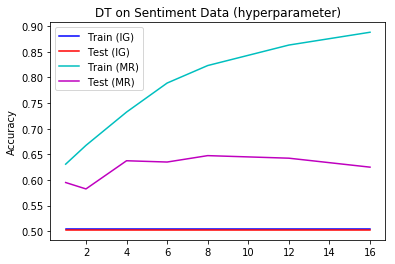

In [13]:
curveIG = runClassifier.hyperparamCurveSet(dt.DT({'criterion': 'ig'}), 'maxDepth', [1,2,4,6,8,12,16], datasets.SentimentData)
curveMR = runClassifier.hyperparamCurveSet(dt.DT({'criterion': 'mr'}), 'maxDepth', [1,2,4,6,8,12,16], datasets.SentimentData)
runClassifier.plotCurvePair('DT on Sentiment Data (hyperparameter)', curveIG, 'IG', curveMR, 'MR')

Now, the x-axis is the value of the maximum depth.

**Q3:** Briefly compare the two **training** curves. Does either splitting criterion perform better than the other for shallow depth (say, ``maxDepth``<10)? Why or why not? How about as ``maxDepth`` increases to 16? Use your understanding of both criteria to answer these questions.

**A3:** For training curves, the accuracy increases as there is more depth for the data to be fit in which allows for better training accuracy. Data can be better fitted when there is more space but while testing it gives the same result.

**Q4:** Briefly compare the two **test** curves. Does either splitting criterion lead to better generalization than the other for shallow depth (say, ``maxDepth``<10)? Why or why not? How about as ``maxDepth`` increases to 16? Use your understanding of both criteria to answer these questions.

**A4:** The test curve depict that the accuracy is slightly higher when maxDepth <10. This is due to the fact that the model has similar end points. 

Now we will display a tree trained using information gain. Beside each branch, we print out the information gain corresponding to the split.

In [14]:
h = dt.DT({'maxDepth': 5, 'criterion': 'ig'})
h.train(datasets.SentimentData.X, datasets.SentimentData.Y)
h

Branch 983 [Gain='1.9999']
  Branch 8151 [Gain='1.9999']
    Branch 8114 [Gain='1.9999']
      Branch 7946 [Gain='1.9999']
        Branch 7448 [Gain='1.9999']
          Leaf 1.0
          Leaf 1.0
        Leaf 1.0
      Leaf 1.0
    Leaf 1.0
  Branch 8160 [Gain='1.9999']
    Branch 8159 [Gain='1.9999']
      Branch 8158 [Gain='1.9999']
        Branch 8152 [Gain='1.9999']
          Leaf 1.0
          Leaf 1.0
        Leaf 1.0
      Leaf 1.0
    Leaf 1.0

Let's print some of the features, so we can see which words this tree uses to make decisions. I've looked up word indexed at ``626``, but you can go ahead and edit as needed.

In [15]:
print(626, datasets.SentimentData.words[626])

626 bad


**Q5:** Look up some words used in the tree. Find a few representative words that seem _helpful_ (contributing to higher accuracy) in this classification task, and a few representative words that seem _unhelpful_. Do you notice a correlation between information gain and the quality of the word in this task? Why or why not?

**A5:** Yes, there is a correlation between information gain and quality of the word in the task. The information gain will be higher for words which help in classification because there is actual information gained with correlation to that word than some other word. 

**Q6:** Should we expect a significant change in test accuracy if we prune subtrees rooted at nodes corresponding to low information gain? Why or why not?

**A6:** There won't be much significant change in test accuracy if we prune subtrees at low information gain as long as their info gain >= 0. The won't affect the computation but negative info gain can cause results which are far from the truth.